### Import Data

In [1]:
from Modelling.Baselines.Data_Preprocessing import import_labeled_data
X,Y=import_labeled_data()

### Split Data

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, stratify=Y)
labels = {0:'None',1:'Wiese', 2:'Straße',3: 'Auto', 4:'See', 5:'Schienen', 6:'Haus', 7:'Wald'}

#convert ID Labels to ID
y_train = [labels[y] for y in y_train]
y_test = [labels[y] for y in y_test]

print(f'X_train Shape: {len(X_train)}\nX_test Shape: {len(X_test)}\ny_train Shape: {len(y_train)}\ny_test Shape:{len(y_test)}')

X_train Shape: 221200
X_test Shape: 94800
y_train Shape: 221200
y_test Shape:94800


## K-Nearest Neighbor Classifier (K-NNC)

Accuracy: 74.81012658227849
              precision    recall  f1-score   support

        Auto       0.46      0.56      0.51      2187
        Haus       0.72      0.81      0.76     19030
        None       0.74      0.82      0.78     42099
        Wald       0.46      0.63      0.53      1917
       Wiese       0.87      0.62      0.73     29567

    accuracy                           0.75     94800
   macro avg       0.65      0.69      0.66     94800
weighted avg       0.76      0.75      0.75     94800



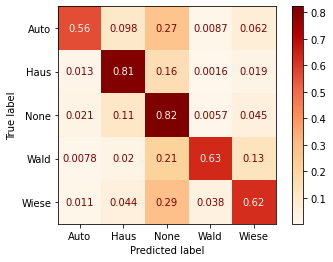

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from numpy import unique
from sklearn.metrics import confusion_matrix

# Train
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# Test
knn_pred = knn.predict(X_test)

# Result
print(f"Accuracy: {accuracy_score(y_test, knn_pred) * 100}")
print(classification_report(y_test, knn_pred))
cm=confusion_matrix(y_test, knn_pred,labels=list(unique(knn_pred)),normalize='true')
disp=ConfusionMatrixDisplay(cm,  display_labels=list(unique(knn_pred)))
disp.plot(cmap="OrRd")

### K-Nearest Neighbor Classifier (K-NNC) with Scaled Data

Accuracy: 77.0042194092827
              precision    recall  f1-score   support

        Auto       0.49      0.58      0.53      2187
        Haus       0.76      0.87      0.81     19030
        None       0.76      0.84      0.80     42099
        Wald       0.46      0.66      0.55      1917
       Wiese       0.87      0.63      0.74     29567

    accuracy                           0.77     94800
   macro avg       0.67      0.72      0.68     94800
weighted avg       0.78      0.77      0.77     94800



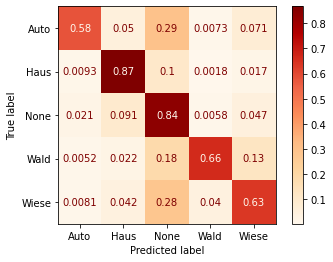

In [ ]:
from Modelling.Baselines.Data_Preprocessing import scale_data
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

#Scale data
X_train=scale_data(X_train)
X_test=scale_data(X_test)

#Train
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

#Test
knn_pred = knn.predict(X_test)

#Result
print(f"Accuracy: {accuracy_score(y_test, knn_pred) * 100}")
print(classification_report(y_test, knn_pred))
cm=confusion_matrix(y_test, knn_pred,labels=list(unique(knn_pred)),normalize='true')
disp=ConfusionMatrixDisplay(cm,  display_labels=list(unique(knn_pred)))
disp.plot(cmap="OrRd")

In [ ]:
from numpy import unique

unique(Y)
from matplotlib.colors import ListedColormap
import numpy as np
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label=y_train)

params = {}
params['learning_rate'] = 0.03
params['boosting_type'] = 'gbdt'  #GradientBoostingDecisionTree
params['objective'] = 'multiclass'  #Multi-class target feature
params['metric'] = 'multi_logloss'  #metric for multi-class
params['max_depth'] = 15
params['num_class'] = 4  #no.of unique values in the target class not inclusive of the end value

clf = lgb.train(params, d_train, 100)
lgb_predictions = clf.predict(X_test)
print(lgb_predictions[1], np.argmax(lgb_predictions[1]))
# lbg_pred = [np.argmax(x) for x in lgb_predictions]
# np.array(lbg_pred).shape

lgb_pred = np.argmax(lgb_predictions, axis=1)
lgb_pred.shape
print(f"Accuracy: {accuracy_score(y_test, lgb_pred) * 100}")
print(classification_report(y_test, lgb_pred))
cm=confusion_matrix(y_test, knn_pred,labels=list(unique(knn_pred)),normalize='true')
disp=ConfusionMatrixDisplay(cm,  display_labels=list(unique(knn_pred)))
disp.plot(cmap="OrRd")
# Visualize Classification Map of LightGBM

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


TypeError: Wrong type(list) for label.
It should be list, numpy 1-D array or pandas Series